In [1]:
# Importar las librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats # Importar la librería stats para pruebas estadísticas

In [2]:
# Cargar el dataset desde la URL proporcionada
dataset_01 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_01.csv"

company_df = pd.read_csv(dataset_01)

In [3]:
# Mostrar una muestra aleatoria de 10 filas del DataFrame para inspeccionar los datos
company_df.sample(10)

,company_name,trips_amount
1,Taxi Affiliation Services,11422
40,6574 - Babylon Express Inc.,31
21,American United,1404
46,3620 - 52292 David K. Cab Corp.,21
8,Star North Management LLC,7455
4,Taxi Affiliation Service Yellow,9299
44,2092 - 61288 Sbeih company,27
51,4623 - 27290 Jay Kim,15
28,5 Star Taxi,310
19,Chicago Medallion Leasing INC,1607


In [4]:
# Obtener información general sobre el DataFrame, incluyendo tipos de datos y valores no nulos
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Cargar el dataset desde la URL proporcionada
dataset_04 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_04.csv"

dropoff_df = pd.read_csv(dataset_04)

In [6]:
# Mostrar una muestra aleatoria de 10 filas del DataFrame para inspeccionar los datos
dropoff_df.sample(10)

,dropoff_location_name,average_trips
14,Near South Side,839.833333
85,Montclare,5.766667
28,Wicker Park,182.600000
82,South Deering,7.500000
2,Streeterville,6664.666667
47,Grand Boulevard,51.600000
6,Grant Park,2068.533333
68,Clearing,14.500000
40,Bucktown,74.300000
53,Jackson Park,33.103448


In [7]:
# Obtener información general sobre el DataFrame, incluyendo tipos de datos y valores no nulos
dropoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
dropoff_df['average_trips'] = dropoff_df['average_trips'].astype(int)

In [9]:
dropoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
dropoff_df.sample(10)

,dropoff_location_name,average_trips
74,Beverly,10
61,Grand Crossing,22
64,Oakland,16
67,Auburn Gresham,15
43,Mckinley Park,64
86,West Elsdon,5
75,Calumet Heights,9
76,Washington Heights,9
71,Edison Park,14
4,O'Hare,2546


In [11]:
sorted_dropoff_df = dropoff_df.sort_values(by='average_trips', ascending=False)
sorted_dropoff_df.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


/tmp/ipython-input-3472546941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_trips', y='dropoff_location_name', data=sorted_dropoff_df.head(10), palette="viridis")


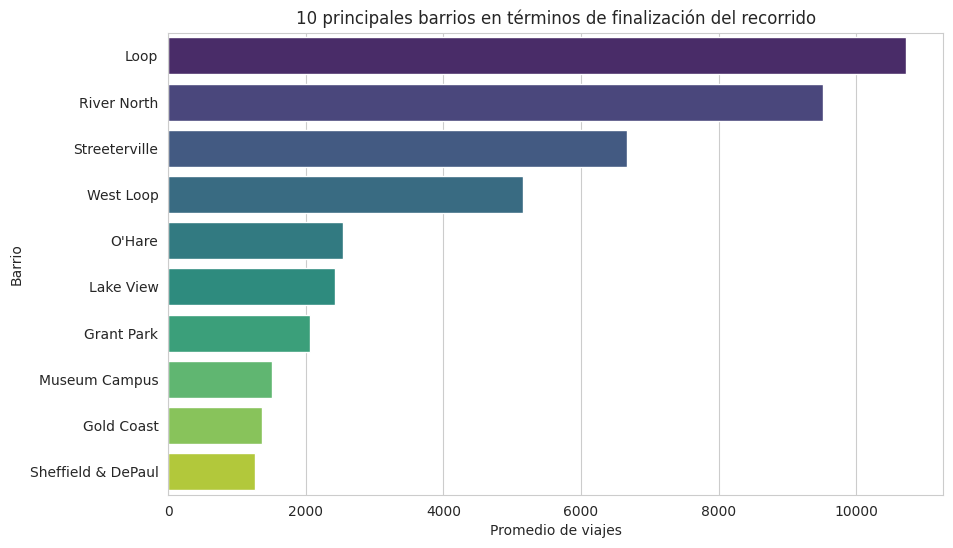

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=sorted_dropoff_df.head(10), palette="viridis")
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.title('10 principales barrios en términos de finalización del recorrido')
plt.show()

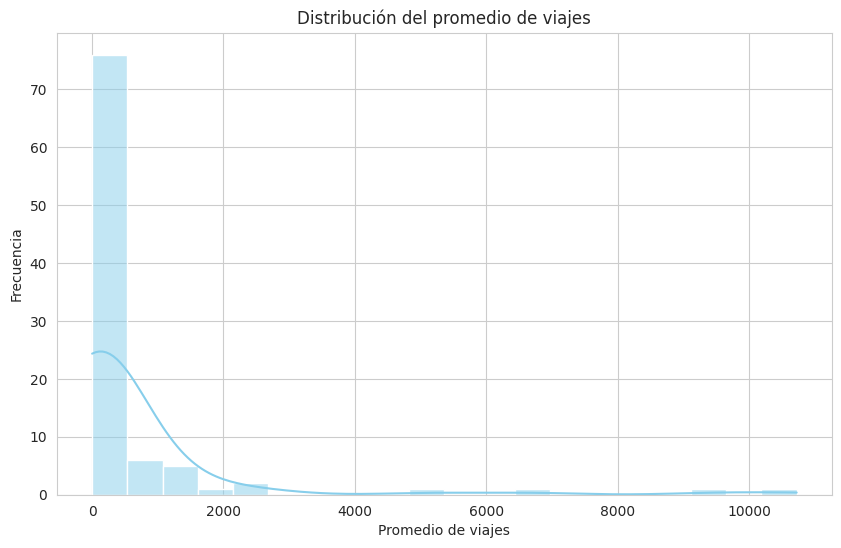

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=sorted_dropoff_df, x='average_trips', bins=20, kde=True, color='skyblue')
plt.xlabel('Promedio de viajes')
plt.ylabel('Frecuencia')
plt.title('Distribución del promedio de viajes')
plt.show()
#

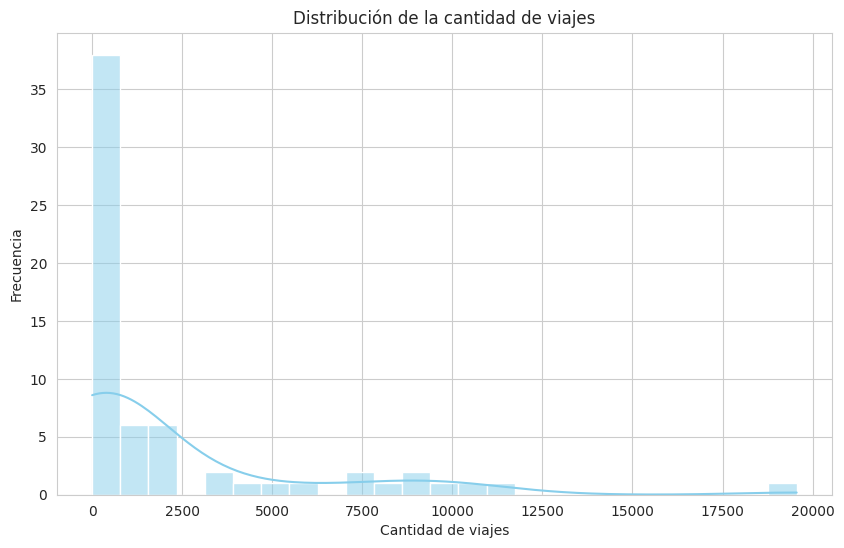

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=company_df, x='trips_amount', bins=25, kde=True, color='skyblue')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de viajes')
plt.show()

/tmp/ipython-input-3962921040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='company_name', x='trips_amount', data=company_df[:11], palette="viridis")


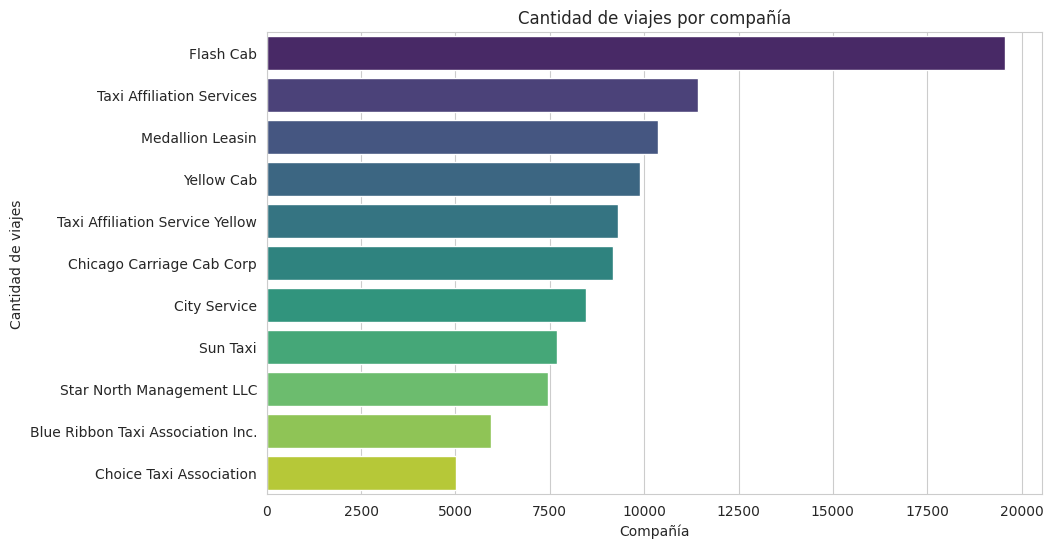

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(y='company_name', x='trips_amount', data=company_df[:11], palette="viridis")
plt.xlabel('Compañía')
plt.ylabel('Cantidad de viajes')
plt.title('Cantidad de viajes por compañía')
plt.show()